<a href="https://colab.research.google.com/github/raghav2069/Stock-market-prediction-using-CNN/blob/main/Multivariate_Linear_Regression___Categorical_Var___Lasso___Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import io

In [ ]:
"""
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["Book1.csv"]))
"""

'\nfrom google.colab import files\nuploaded = files.upload()\ndf = pd.read_csv(io.BytesIO(uploaded["Book1.csv"]))\n'

In [ ]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv'
df = pd.read_csv(url)

In [ ]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


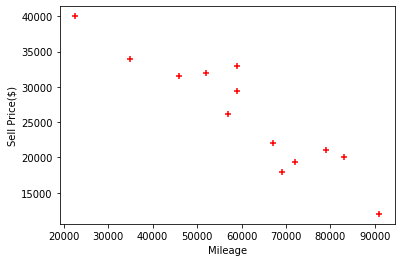

In [ ]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df.Mileage, df['Sell Price($)'], color='red', marker='+')

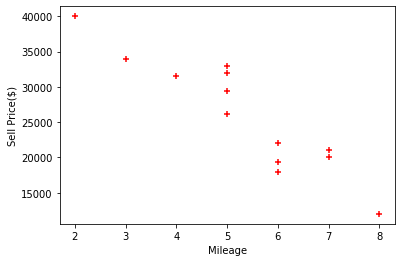

In [ ]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color='red', marker='+')

In [ ]:
dummies = pd.get_dummies(df['Car Model'])

In [ ]:
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [ ]:
X = final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [ ]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
las = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1).fit(X_train, y_train)
rid = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1).fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

0.8675370464375716

In [ ]:
las.score(X_test, y_test)

0.939345840202266

In [ ]:
rid.score(X_test, y_test)

0.9486898862039282

In [ ]:
rid.coef_

array([  -0.40578643,  -22.29516149,   48.91911435, -189.58347576])

In [ ]:
rid.intercept_

51059.15290161995

In [ ]:
rid.predict([[86000, 7, 0, 1], [45000, 4, 0, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


array([15815.87031602, 32709.58290597])

In [ ]:
'''
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price, color='red', marker='+')
plt.plot(df.Area,reg.predict(df[['Area']]), color='blue')
'''

"\nplt.xlabel('Area')\nplt.ylabel('Price')\nplt.scatter(df.Area,df.Price, color='red', marker='+')\nplt.plot(df.Area,reg.predict(df[['Area']]), color='blue')\n"

In [ ]:
'''
import joblib
joblib.dump(reg, 'model_joblib')
'''

"\nimport joblib\njoblib.dump(reg, 'model_joblib')\n"

In [ ]:
''''
mf = joblib.load('model_joblib')
'''

"'\nmf = joblib.load('model_joblib')\n"

In [ ]:
'''
mf.predict([[3000, 3, 40]])
'''

'\nmf.predict([[3000, 3, 40]])\n'